<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:# %pylab & %matplotlib inlice: Magic function that allows import matplotlib NumPy modules
%pylab inline 
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (12,8)
sns.set(color_codes = True)

In [3]:
#Overriding fidure sizing
from IPython.core.pylabtools import figsize
figsize(24,12)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [50]:
#ANSWER: reading the data
bikes = pd.read_csv("bikeshare.csv", header=0)
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# detailing the name the columns before you plot
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [56]:
#Getting a concise summary of the DataFrame
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   workingday  17379 non-null  int64  
 2   weathersit  17379 non-null  int64  
 3   temp        17379 non-null  float64
 4   atemp       17379 non-null  float64
 5   hum         17379 non-null  float64
 6   windspeed   17379 non-null  float64
 7   casual      17379 non-null  int64  
 8   registered  17379 non-null  int64  
 9   cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [57]:
#viewing the dimensionality of the dataset (number of rows=observations and columns=variables)
bikes.shape

(17379, 10)

In [28]:
# To know the type of the data (integers, floats, booleans, etc.)
bikes = pd.read_csv("bikeshare.csv")
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [29]:
# to displays the main statistical features of the dataset
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

In [12]:
#Plotting some of the variables of the dataset using matplotlib
bikes1 = pd.read_csv("bikeshare.csv",usecols=['windspeed', 'temp'])
print(bikes1)

       temp  windspeed
0      0.24     0.0000
1      0.22     0.0000
2      0.22     0.0000
3      0.24     0.0000
4      0.24     0.0000
...     ...        ...
17374  0.26     0.1642
17375  0.26     0.1642
17376  0.26     0.1642
17377  0.26     0.1343
17378  0.26     0.1343

[17379 rows x 2 columns]


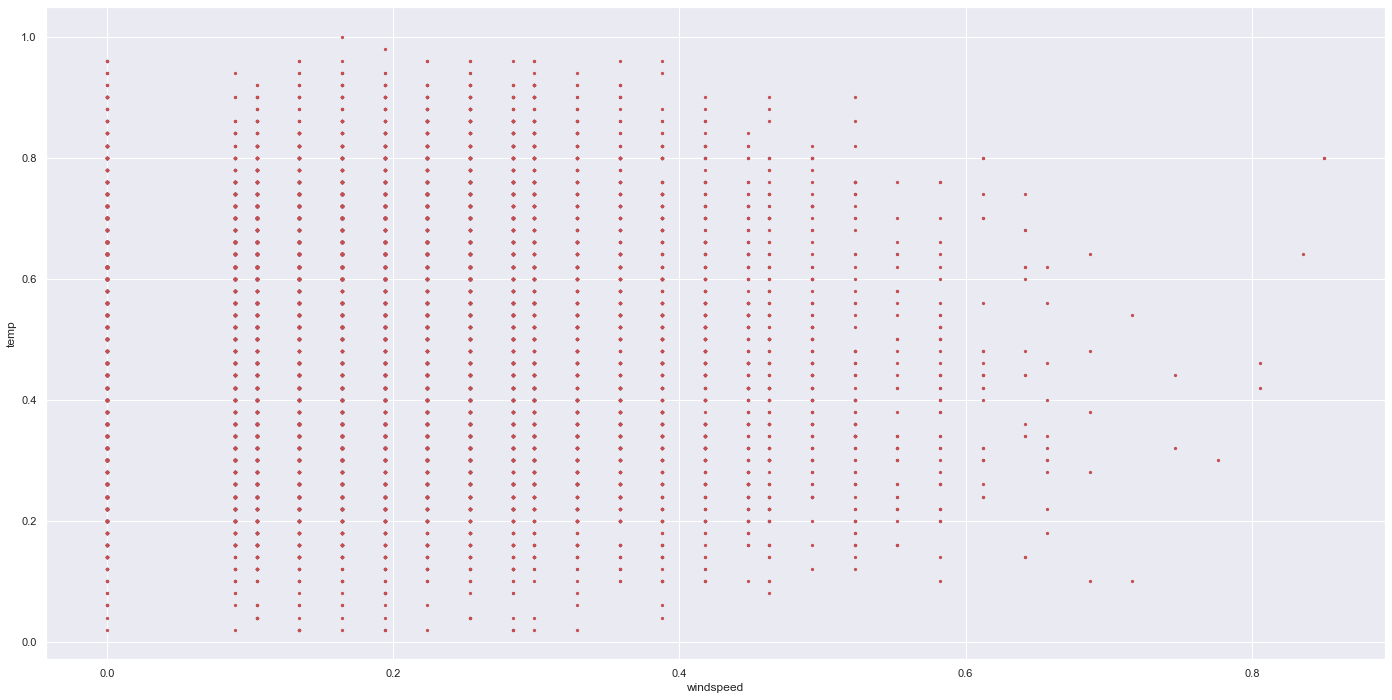

In [13]:
#ANSWER: Scatter plot
bikes1.plot(kind='scatter', x='windspeed', y='temp', marker = '.', color='r')
plt.show()

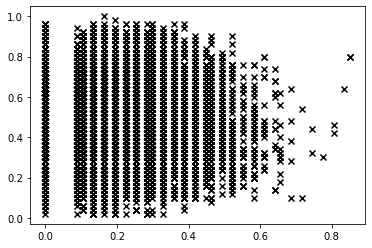

In [12]:
#Scatter plot. Another way to make a scatter plot
x = bikes1.windspeed
y = bikes1.temp
plt.scatter(x,y, marker= 'x', color ='black')

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

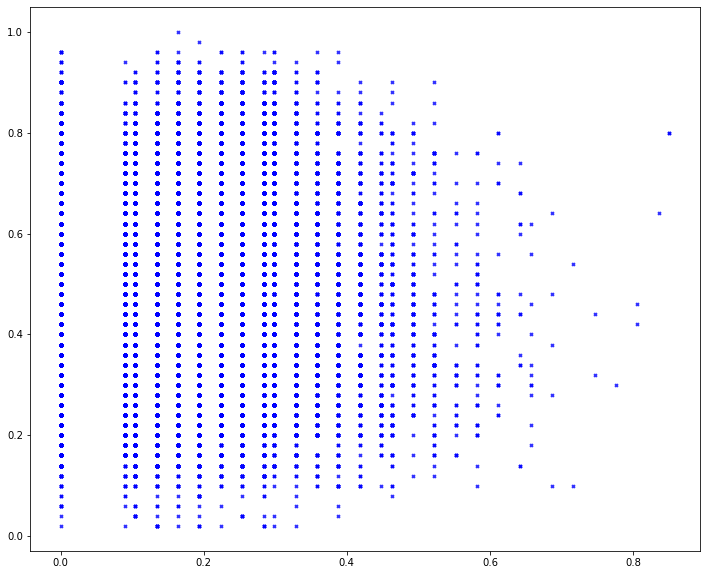

In [42]:
#Controlling apperance of scatter plot
#s = Default marker size in points **2
#linewidhts = linewidth of the marker edges. Float or None
#edgecolors= Default is 'face'. You can change to None. Color or None or 'auto'
#alpha: blending value, between 0 (transparent) and 1 (opaque). default = 'None'. Float or None
plt.scatter(x,y, marker='x', s=8, color='blue', linewidths=2, alpha=0.8, edgecolors='black')
plt.show()

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

In [14]:
#ANSWER:getting descriptive statistics of the data for continuous variables
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
#To describe statistics for categorical variables
bikes.describe(include=object)

,dteday
count,17379
unique,731
top,2012-08-17
freq,24


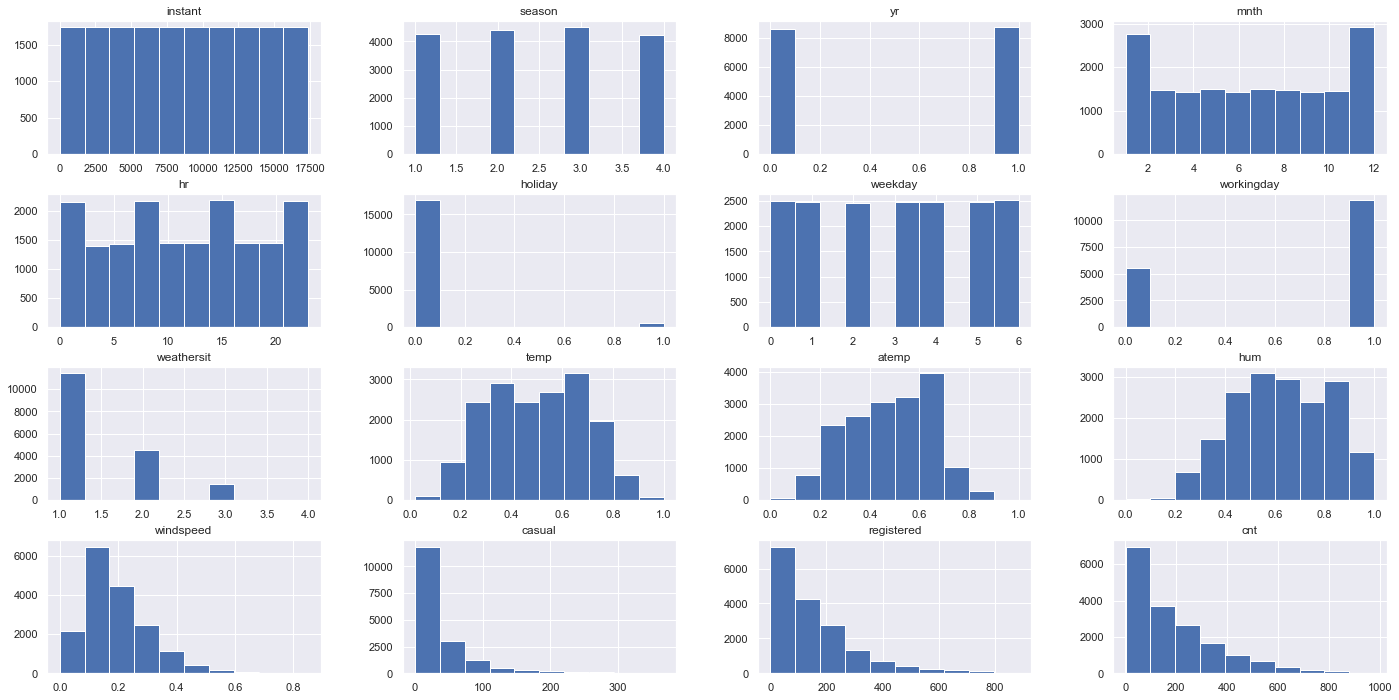

In [15]:
#Histograms of continuos variables of the dataset
hist = bikes.hist(bins=10)

What do the horizontal and vertical axes represent?

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

<AxesSubplot:>

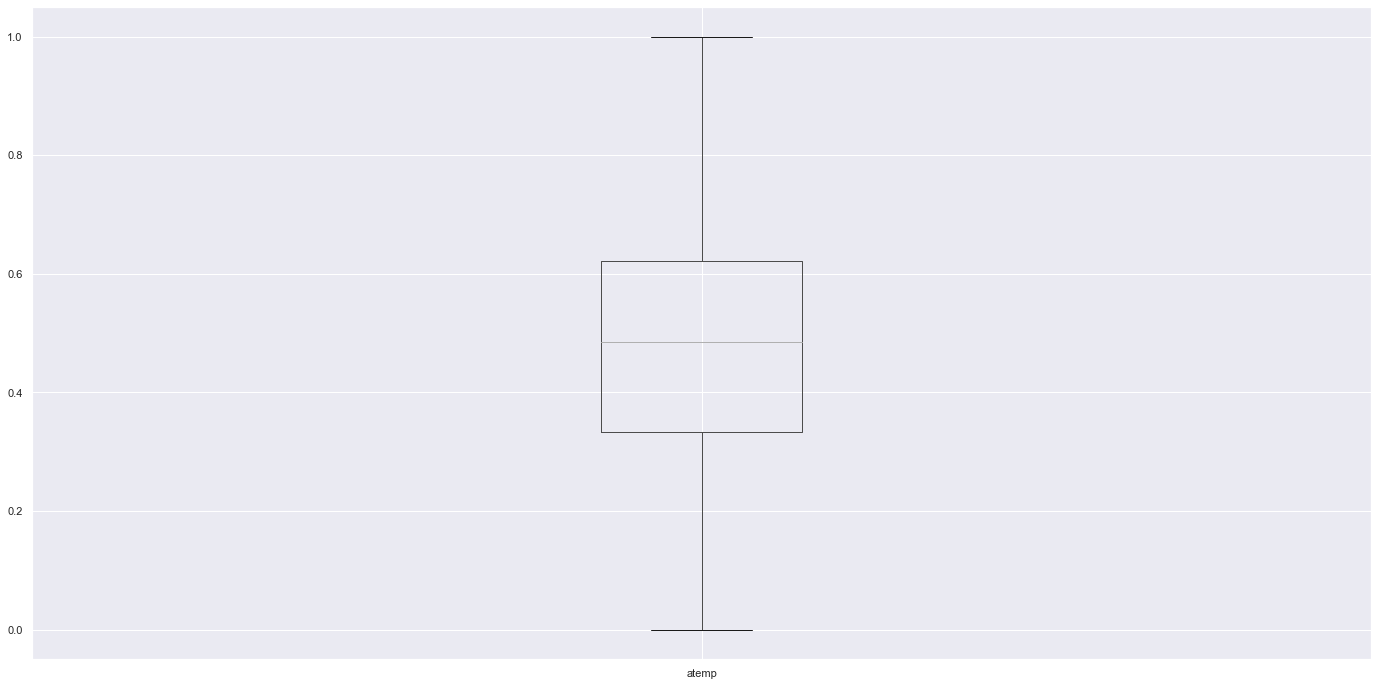

In [16]:
#Box and whisker plot for column atemp with default apperances
#by: str or array-like, optional
#ax: object of class matplotlib.axes.Axes, optional
#fontsize+float or str
#rot: rotation angle of labels (in degrees) with respect to the screen coordinate system. int or float, default 0
#grid= bool, default True
#figsize= a tuple (width,height) in inches
#layout = tuple (rows,columns), optional
#return_type = {'axes', 'dict', 'both'} or None, default 'axes'
#backend: str, default None
bikes.boxplot(column='atemp', by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None)

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

<AxesSubplot:>

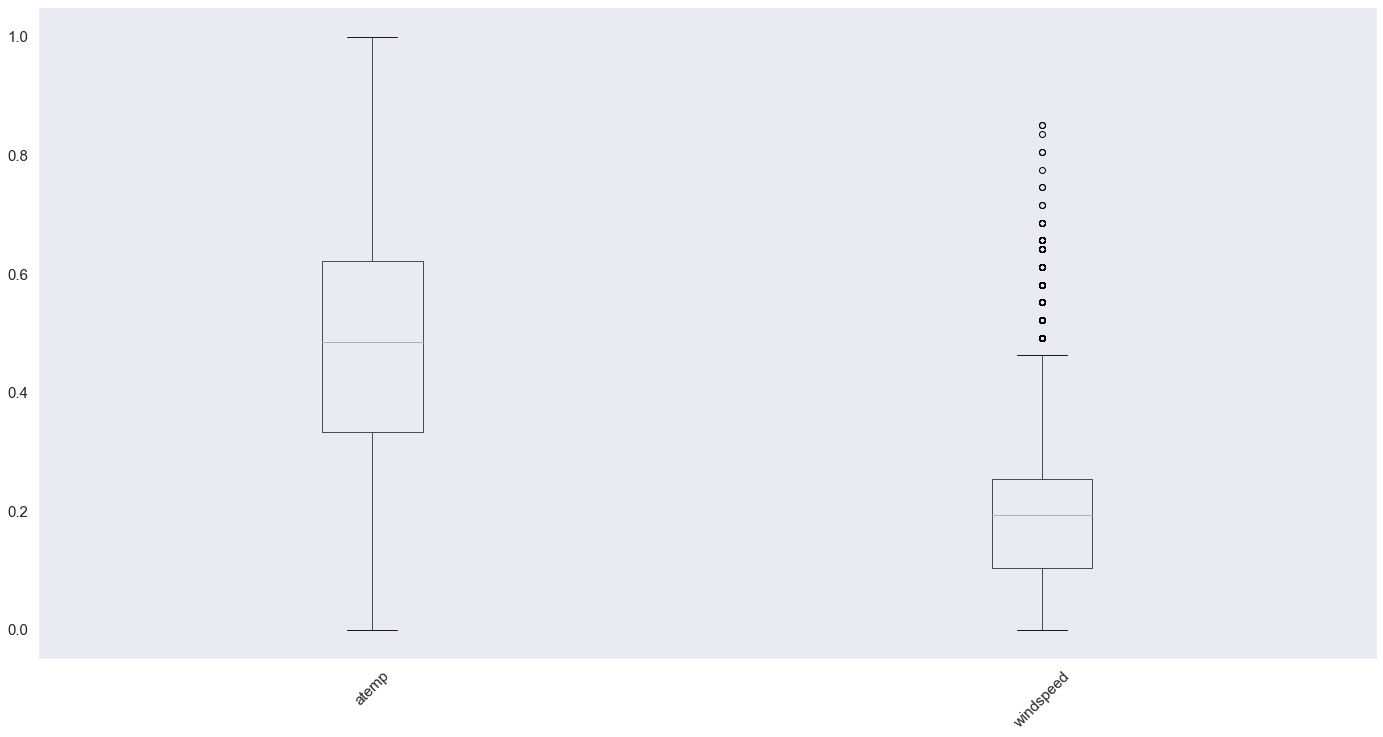

In [6]:
#ANSWER: to boxplot more than one column (if they have compatible ranges)
bikes.boxplot(column=['atemp','windspeed'], grid=False, rot=45, fontsize=15)

In [32]:
test = bikes.groupby('season').temp.mean()
test

season
1    0.299147
2    0.544663
3    0.706410
4    0.423138
Name: temp, dtype: float64

([<matplotlib.axis.XTick at 0x1705e6093d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

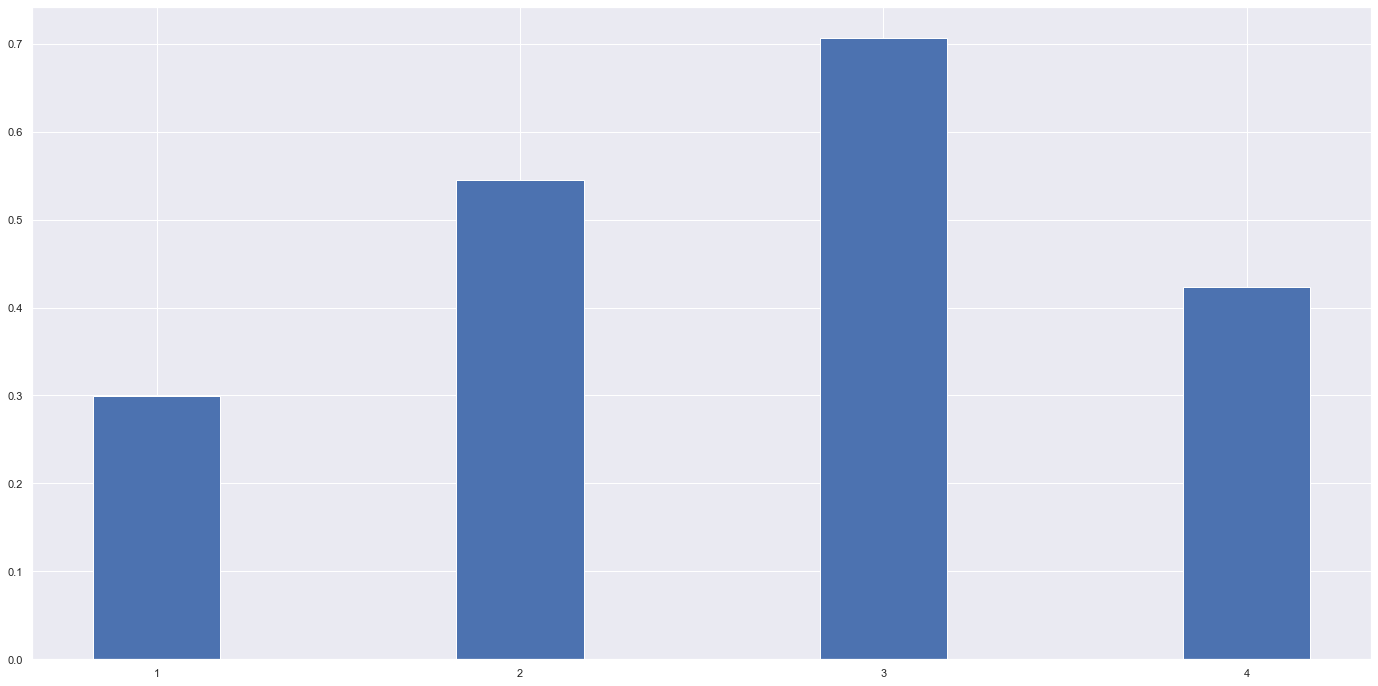

In [41]:
#Bar plot using matplolib
plt.bar(test.index, test.values, width=0.35)
plt.xticks([1,2,3,4])

In [43]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<AxesSubplot:xlabel='hr', ylabel='temp'>

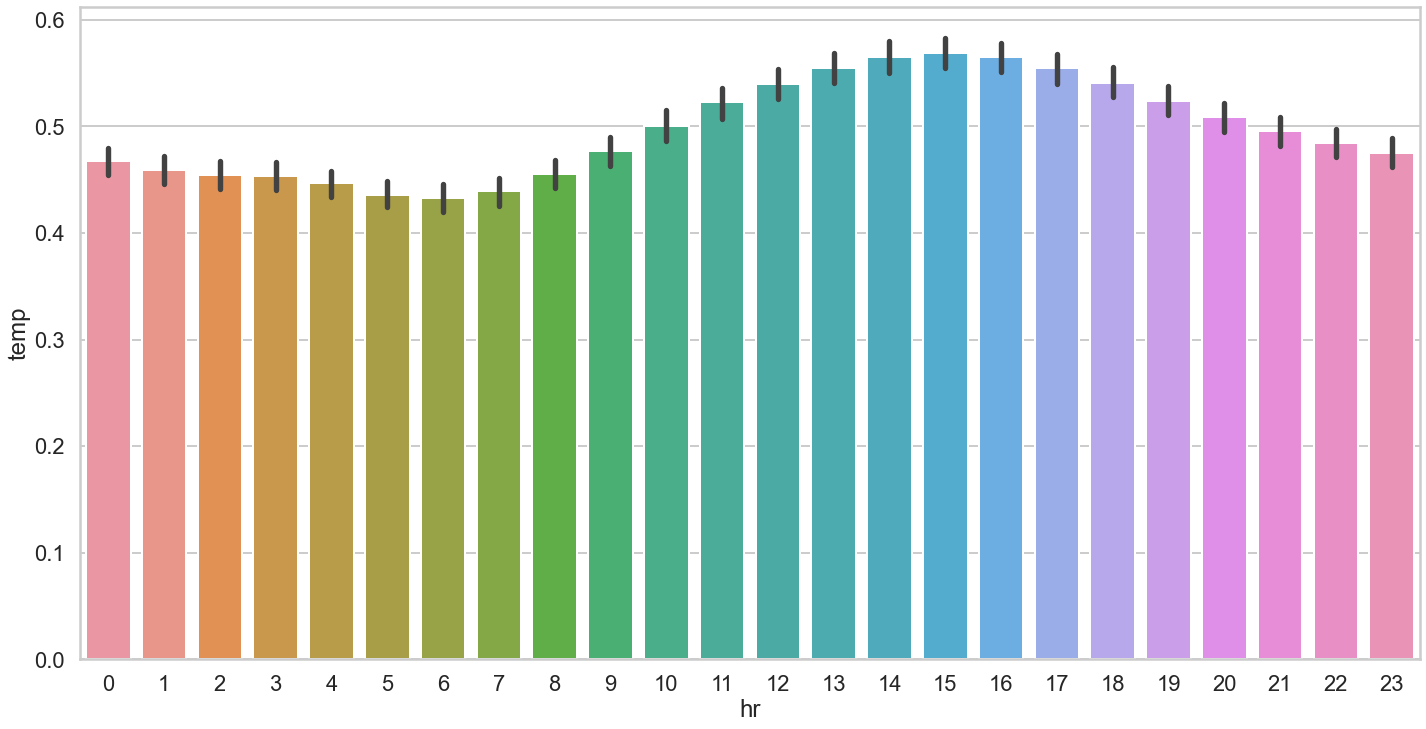

In [46]:
# Bar plot using seaborn
sns.set_theme(style="whitegrid")
sns.set_context('poster')


sns.barplot(x='hr', y='temp', data=bikes)

In [49]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='hr', ylabel='temp'>

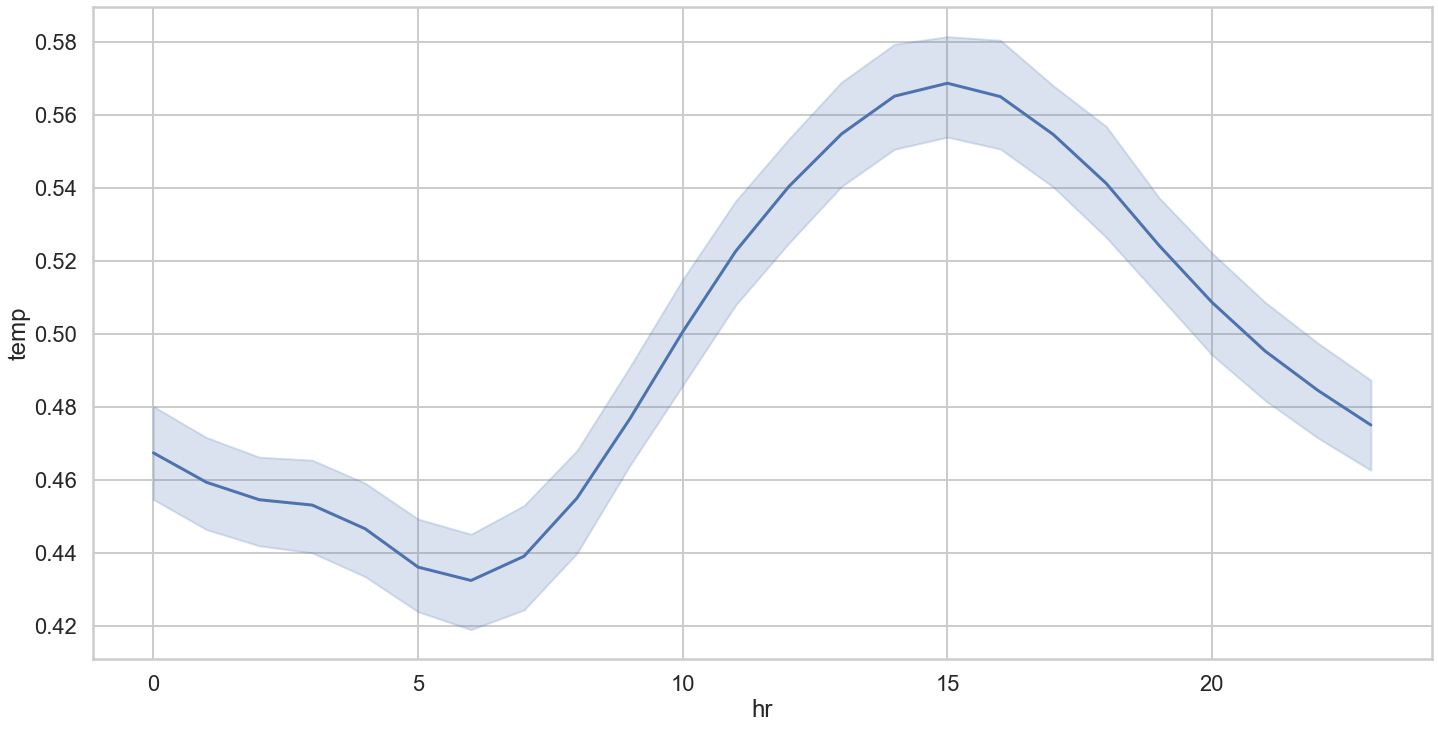

In [51]:
#lineplot using seaborn
sns.lineplot(x='hr', y='temp', data=bikes)

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [9]:
#Uploading a database from the web
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [7]:
#To print the first 5 rows of the dataset using .head() function
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
#To print the first 4 rows and all the columns of the dataset using .iloc based on the row index
iris_data.iloc[0:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [10]:
#To know the general info of the dataset using info() to get a concise summary of the dataframe. 
#An important step when doing exploratory analysis of the data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [8]:
#To find the unique elements of an array. Unique() returns the sorted unique elements of any array
iris_data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [42]:
#To split the data into separate groups to perform computations for better analysis using groupby()
iris_data.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [46]:
#Using groupby()
iris_data.groupby('sepal_length' and 'sepal_width').mean()

,sepal_length,petal_length,petal_width
sepal_width,,,
2.0,5.000000,3.500000,1.000000
2.2,6.066667,4.500000,1.333333
2.3,5.325000,3.250000,0.975000
2.4,5.300000,3.600000,1.033333
2.5,5.762500,4.512500,1.550000
2.6,6.160000,4.880000,1.420000
2.7,5.855556,4.622222,1.555556
2.8,6.335714,5.042857,1.707143
2.9,6.060000,4.350000,1.320000


The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

Text(0, 0.5, 'sepal_length (cm)')

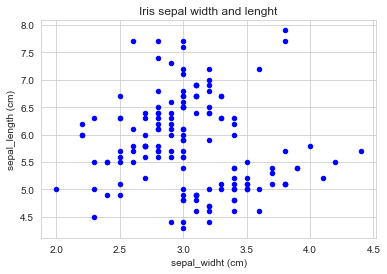

In [24]:
#Scattter plotting using matplotlib, giving a title and labeling axes
iris_data.plot(kind= "scatter", x='sepal_width', y='sepal_length', c='blue')
plt.title("Iris sepal width and lenght")
plt.xlabel("sepal_widht (cm)")
plt.ylabel("sepal_length (cm)")

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

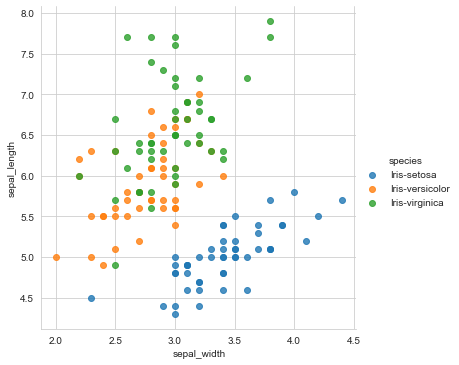

In [17]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='sepal_width', y= 'sepal_length', data= iris_data, hue= 'species', fit_reg = False)

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

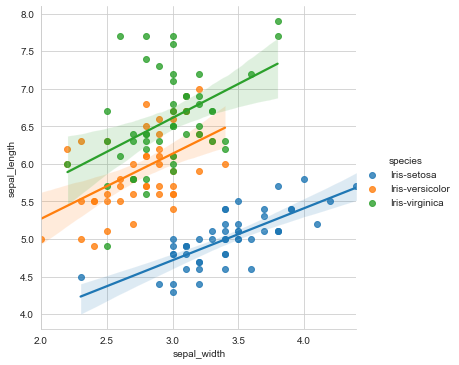

In [37]:
#Scatter plot using seaborn and lmplot().  fit_reg=true (estimate and plot a regression model relating the x and y variables)
sns.lmplot(x='sepal_width', y= 'sepal_length', data= iris_data, hue= 'species', fit_reg = True)

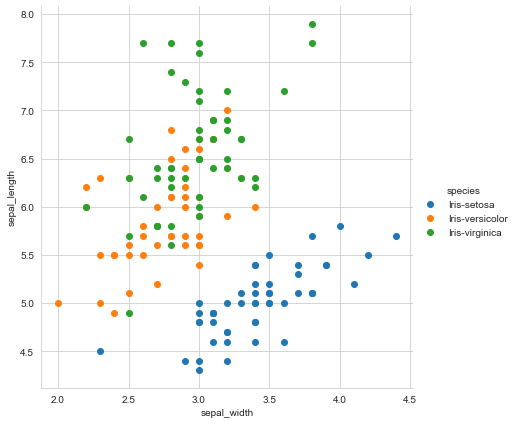

In [14]:
#Scatter plot using seaborn and FacetGrid()
sns.set_style("whitegrid")
sns.FacetGrid(iris_data, hue = 'species', height = 6).map(plt.scatter, 'sepal_width', 'sepal_length').add_legend()

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

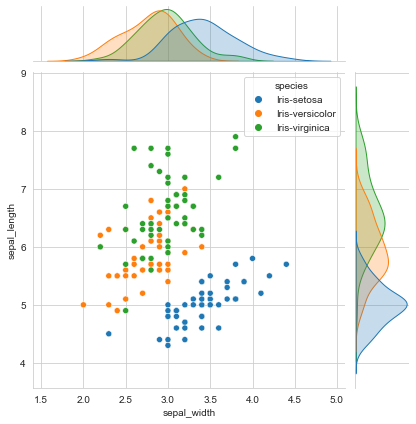

In [48]:
#A jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. 
#Draw multiple bivariate plots with univariate marginal distributions
sns.jointplot(x='sepal_width', y= 'sepal_length', data= iris_data, hue= 'species')

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

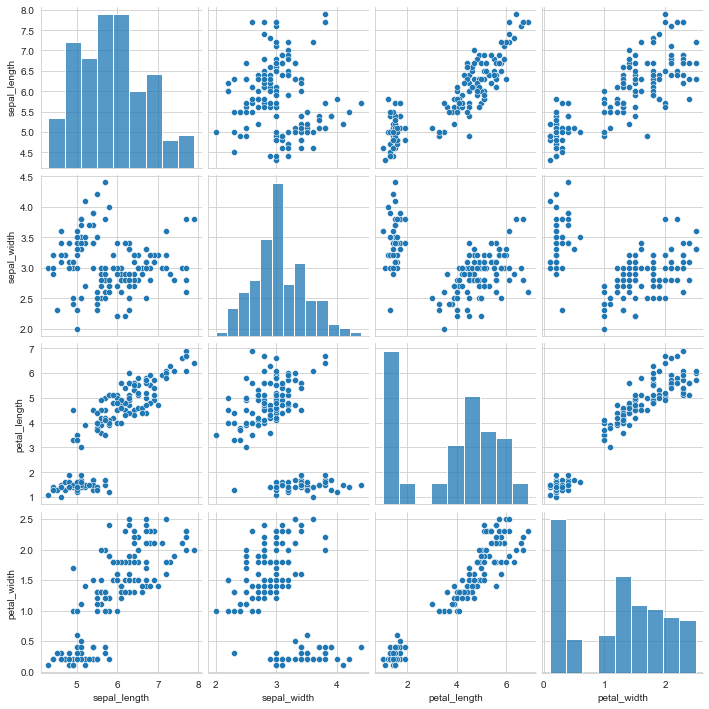

In [52]:
# Pairplot creates a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column
# If the classes are not known
sns.pairplot(iris_data)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

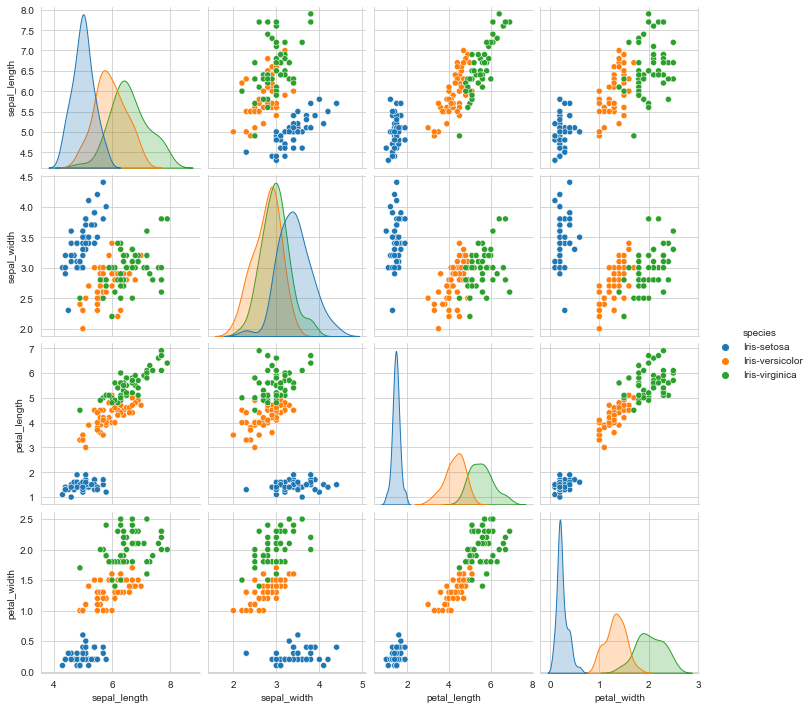

In [51]:
# Pairplot creates a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column
sns.pairplot(iris_data, hue='species')

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [54]:
# .corr( function computes pairwise correlation of columns, excluding NA/null values.
iris_data.corr(method='pearson', min_periods=1)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install pandas_profiling

In [55]:
# ANSWER
import pandas_profiling
df = pd.read_csv("Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.866670, -64.550000)"


Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [56]:
# Importing the function
from pandas_profiling import ProfileReport


In [59]:
# Generate the report
profile = ProfileReport(df, title= 'DF Pandas Profiling Report', explorative=True)
profile

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [52]:
airpass = pd.read_csv('AirPassengers.csv')
airpass.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [53]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [56]:
airpass['time']= pd.to_datetime(airpass.TravelDate)

In [58]:
airpass.dtypes

TravelDate            object
Passengers             int64
time          datetime64[ns]
dtype: object

In [57]:
airpass

,TravelDate,Passengers,time
0,1/1/1949,112,1949-01-01
1,2/1/1949,118,1949-02-01
2,3/1/1949,132,1949-03-01
3,4/1/1949,129,1949-04-01
4,5/1/1949,121,1949-05-01
...,...,...,...
139,8/1/1960,606,1960-08-01
140,9/1/1960,508,1960-09-01
141,10/1/1960,461,1960-10-01
142,11/1/1960,390,1960-11-01


In [ ]:
from datetime import datetime

In [86]:
# To rename a column on the dataframe using rename()
airpass_new = airpass.rename(columns={'Passengers' : 'Number of Passangers'})
airpass_new.head()

,TravelDate,Number of Passangers
time,,
1949-01-01,1/1/1949,112
1949-02-01,2/1/1949,118
1949-03-01,3/1/1949,132
1949-04-01,4/1/1949,129
1949-05-01,5/1/1949,121


Set `TravelDate` as index

In [72]:
# Set Column as Index using set_index()
airpass_new = airpass.set_index(['TravelDate'])

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [73]:
# ANSWER
airpass_new.head()

,Passengers
TravelDate,
1/1/1949,112
2/1/1949,118
3/1/1949,132
4/1/1949,129
5/1/1949,121


Here's how to see the values of the index:

In [76]:
#Seeing values of the index using index.values in the modified dataset
airpass_new.index.values

array(['1/1/1949', '2/1/1949', '3/1/1949', '4/1/1949', '5/1/1949',
       '6/1/1949', '7/1/1949', '8/1/1949', '9/1/1949', '10/1/1949',
       '11/1/1949', '12/1/1949', '1/1/1950', '2/1/1950', '3/1/1950',
       '4/1/1950', '5/1/1950', '6/1/1950', '7/1/1950', '8/1/1950',
       '9/1/1950', '10/1/1950', '11/1/1950', '12/1/1950', '1/1/1951',
       '2/1/1951', '3/1/1951', '4/1/1951', '5/1/1951', '6/1/1951',
       '7/1/1951', '8/1/1951', '9/1/1951', '10/1/1951', '11/1/1951',
       '12/1/1951', '1/1/1952', '2/1/1952', '3/1/1952', '4/1/1952',
       '5/1/1952', '6/1/1952', '7/1/1952', '8/1/1952', '9/1/1952',
       '10/1/1952', '11/1/1952', '12/1/1952', '1/1/1953', '2/1/1953',
       '3/1/1953', '4/1/1953', '5/1/1953', '6/1/1953', '7/1/1953',
       '8/1/1953', '9/1/1953', '10/1/1953', '11/1/1953', '12/1/1953',
       '1/1/1954', '2/1/1954', '3/1/1954', '4/1/1954', '5/1/1954',
       '6/1/1954', '7/1/1954', '8/1/1954', '9/1/1954', '10/1/1954',
       '11/1/1954', '12/1/1954', '1/1/1955', '

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [92]:
ts = airpass_new['Passengers']

We use the datetime index exactly like a row number index:

In [59]:
airpass.head()

,TravelDate,Passengers,time
0,1/1/1949,112,1949-01-01
1,2/1/1949,118,1949-02-01
2,3/1/1949,132,1949-03-01
3,4/1/1949,129,1949-04-01
4,5/1/1949,121,1949-05-01


In [76]:
airpass.set_index('time', inplace=True)

In [77]:
airpass

,TravelDate,Passengers
time,,
1949-01-01,1/1/1949,112
1949-02-01,2/1/1949,118
1949-03-01,3/1/1949,132
1949-04-01,4/1/1949,129
1949-05-01,5/1/1949,121
...,...,...
1960-08-01,8/1/1960,606
1960-09-01,9/1/1960,508
1960-10-01,10/1/1960,461


In [82]:
airpass['1949-05']

,TravelDate,Passengers
time,,
1949-05-01,5/1/1949,121


In [77]:
# In original dataset
airpass.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143], dtype=int64)

Or, we can refer to the row by its datetime equivalent:

Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [87]:
airpass['1960']

,TravelDate,Passengers
time,,
1960-01-01,1/1/1960,417
1960-02-01,2/1/1960,391
1960-03-01,3/1/1960,419
1960-04-01,4/1/1960,461
1960-05-01,5/1/1960,472
1960-06-01,6/1/1960,535
1960-07-01,7/1/1960,622
1960-08-01,8/1/1960,606
1960-09-01,9/1/1960,508


The most basic way to plot a time series is to let Pandas apply the default:

<AxesSubplot:xlabel='TravelDate'>

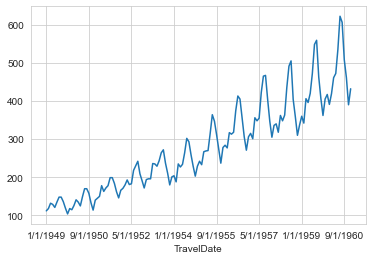

In [105]:
#To plot a time series using plot()
ts.plot()

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [0]:
import folium

In [108]:
# Read SF Incidents data
crime_csv = 'SFPD_Incidents_-_Current_Year__2015_.csv'

Convert `Date` Column to DateTime and set as index 

In [0]:
# ANSWER


Draw a timeseries plot to visualize number of crimes for each day.

In [0]:
# ANSWER

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [0]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [0]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [0]:
# ANSWER

Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [0]:
# ANSWER

[BONUS] Create a heatmap of the incident happened in SF.

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [0]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



